<a href="https://colab.research.google.com/github/ash0411/major_project/blob/main/Copy_of_Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [ ]:
!cat /proc/gpuinfo

cat: /proc/gpuinfo: No such file or directory


In [ ]:
!ls /zoneinfo

ls: cannot access '/zoneinfo': No such file or directory


In [ ]:
!pip install plot-keras-history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-cp37-none-any.whl size=8614 sha256=83bb099374f9947dec53a7ebf374df5f642bf437756074c73436116da6d7f34e
  Stored in directory: /root/.cache/pip/wheels/8b/cb/fb/cbeba24d72e736b8987b7d0dc37afc0e76f3c16e544ceff727
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-cp37-none-any.whl size=7610 sha256=f24278064d6d5827b0c0d11d72ab3772c22ac2b03808b07c749108f3bd140b0a
  Stored in directory: /root/.cache/pip/wheels/2a/62/31/d348320becc60729f508a2c5aad445b94d7543c5cb577cfb9d
  Created wheel for compress-json: filename=compress_json-1.0.4-cp37-none-any.whl size=4586 sha256=4715ca1ca42cc6209d62c34b2c48acd695ea17464216abbdace4ce5a97ab1462
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM , GRU, Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.callbacks import ModelCheckpoint
from plot_keras_history import plot_history
from sklearn.model_selection import RepeatedKFold

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Bidirectional

# loading database

In [ ]:
root = '/content/drive/MyDrive/major_project/'
df = pd.read_csv(root + "dataset/"+"train_processed.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

## normal

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,-1], df.iloc[:,2:-1], test_size=0.20, random_state=42)

## for k fold

In [ ]:
X = df.iloc[:,-1]
Y = df.iloc[:,2:-1]

In [ ]:
Y

,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
14002,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# loading major classes

In [ ]:
root = '/content/drive/MyDrive/major_project/'
df = pd.read_csv(root + "dataset/"+"train_processed.csv")

In [ ]:
df1 = df.iloc[:,2:6]

In [ ]:
df1['Machine Learning'] = df["Machine Learning"]
df1['new_summary'] = df["new_summary"]

In [ ]:
df1

,Computer Science,Mathematics,Physics,Statistics,Machine Learning,new_summary
0,0,0,1,0,0,evergrowe dataset inside observational astrono...
1,1,0,0,0,0,propose framework consider optimal tmatching e...
2,0,0,1,0,0,nanostructures open shell transition metal mol...
3,0,0,1,0,0,star selfgravitate fluid inside pressure buoya...
4,1,0,0,0,1,deep neural perception control network likely ...
...,...,...,...,...,...,...
13999,1,0,0,0,0,methodology automatic detection event basis in...
14000,1,0,0,0,0,consider case inside robot navigate inside unk...
14001,0,0,1,0,0,despite usually consider two compete phenomena...
14002,1,0,0,0,0,present framework implementation rely natural ...


In [ ]:
counts = []
categories = list(df1.columns.values)
categories.remove('new_summary')
for i in categories:
    counts.append((i, df1[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'research papers'])
df_stats

,category,research papers
0,Computer Science,5884
1,Mathematics,2831
2,Physics,3856
3,Statistics,3794
4,Machine Learning,3825


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,-1], df1.iloc[:,:-1], test_size=0.20, random_state=42)

In [ ]:
df1['new_summary'].apply(lambda x: len(x.split(" "))).mean()
max_len = 102

# text processing

In [ ]:
np.random.seed(7)
text = np.concatenate((X_train, X_test), axis=0)
text = np.array(text)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
# maximum_len = 0
# for i in sequences:
#   if len(i) > maximum_len:
#     maximum_len = len(i)
word_index = tokenizer.word_index
text = pad_sequences(sequences, maxlen=max_len)
print('Found %s unique tokens.' % len(word_index))
indices = np.arange(text.shape[0])
# np.random.shuffle(indices)
text = text[indices]
print(text.shape)
X_train = text[0:len(X_train), ]
X_test = text[len(X_train):, ]

Found 62783 unique tokens.
(14004, 102)


# making embeddings

In [ ]:
embeddings_dict = {}

In [ ]:
with open("/content/drive/MyDrive/major_project/glove.6B/glove.6B.300d.txt", 'r', encoding="utf-8") as f:
      for line in f:
        values = line.split()
        #print(values)
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
def find_closest_embeddings(embedding):
  return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [ ]:
#find_closest_embeddings(embeddings_dict["factor"])[:5]

In [ ]:
MAX_SEQUENCE_LENGTH=332
EMBEDDING_DIM=300
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector

# model creation

In [ ]:
import tensorflow as tf

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
def gru_attention(word_index,embeddings_index,nclasses,MAX_SEQUENCE_LENGTH=332, EMBEDDING_DIM=300, dropout=0.5,RNN_CELL_SIZE = 32):
  seq_input = Input(shape= (max_len,),dtype= "int32")
  embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
  for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              if len(embedding_matrix[i]) != len(embedding_vector):
                  print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                        "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                  " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                  exit(1)
              embedding_matrix[i] = embedding_vector
  embedded_sequences = Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)(seq_input)
  #embedded_sequences = Embedding(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)(sequence_input)
  gru = Bidirectional(GRU(32, return_sequences = True), name="bi_gru_0")(embedded_sequences)
  (gru, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(gru)
  #Since our model uses a bi-directional RNN, we first concatenate the hidden states from each RNN before computing the attention weights and applying the weighted sum.
  state_h = Concatenate()([forward_h, backward_h])
  state_c = Concatenate()([forward_c, backward_c])
  context_vector, attention_weights = Attention(10)(gru, state_h)
  #drop1 = Dropout(0.2)(gru1)
  #(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)
  #Since our model uses a bi-directional RNN, we first concatenate the hidden states from each RNN before computing the attention weights and applying the weighted sum
  dense1 = Dense(32, activation="relu")(context_vector)
  dropout = Dropout(0.05)(dense1)
  output = Dense(nclasses, activation="sigmoid")(dropout)
  model = tf.keras.Model(inputs=seq_input, outputs=output)
  METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
  ]

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=METRICS)
  return model

In [ ]:
def bilstm_attention(word_index,embeddings_index,nclasses,MAX_SEQUENCE_LENGTH=332, EMBEDDING_DIM=300, dropout=0.5,RNN_CELL_SIZE = 32):
  seq_input = Input(shape= (max_len,),dtype= "int32")
  embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
  for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              if len(embedding_matrix[i]) != len(embedding_vector):
                  print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                        "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                  " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                  exit(1)
              embedding_matrix[i] = embedding_vector
  embedded_sequences = Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)(seq_input)
  #embedded_sequences = Embedding(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)(sequence_input)
  lstm = Bidirectional(LSTM(32, return_sequences = True), name="bi_lstm_0")(embedded_sequences)
  (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)
  #Since our model uses a bi-directional RNN, we first concatenate the hidden states from each RNN before computing the attention weights and applying the weighted sum.
  state_h = Concatenate()([forward_h, backward_h])
  state_c = Concatenate()([forward_c, backward_c])
  context_vector, attention_weights = Attention(10)(lstm, state_h)
  dense1 = Dense(20, activation="relu")(context_vector)
  dropout = Dropout(0.05)(dense1)
  output = Dense(nclasses, activation="sigmoid")(dropout)
  model = tf.keras.Model(inputs=seq_input, outputs=output)
  METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
  ]

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=METRICS)
  return model

In [ ]:
def RNN_MODEL(word_index,embeddings_index,nclasses,MAX_SEQUENCE_LENGTH=332, EMBEDDING_DIM=300, dropout=0.5):
  model = Sequential()
  hidden_layer = 3
  gru_node  = 32
  #EMBEDDING_DIM = 300
  embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
  for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              if len(embedding_matrix[i]) != len(embedding_vector):
                  print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                        "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                  " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                  exit(1)
              embedding_matrix[i] = embedding_vector
  model.add(Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False))


  print(gru_node)
  for i in range(0,hidden_layer):
    model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
  model.add(GRU(gru_node, recurrent_dropout=0.2))
  model.add(Dropout(dropout))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(nclasses, activation='sigmoid'))


  #model.compile(loss='binary_crossentropy',
  #                  optimizer='adam',
  #                    metrics=['accuracy'])
  model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])
  return model


In [ ]:
def RNN_MODEL_1(word_index,embeddings_index,embedding_matrix,nclasses,MAX_SEQUENCE_LENGTH=332, EMBEDDING_DIM=300, dropout=0.5):
  model = Sequential()
  hidden_layer = 3
  gru_node  = 32
  #EMBEDDING_DIM = 300

  model.add(Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=True))


  print(gru_node)
  for i in range(0,hidden_layer):
    model.add(LSTM(gru_node,return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
  model.add(LSTM(gru_node, recurrent_dropout=0.2))
  model.add(Dropout(dropout))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(nclasses, activation='sigmoid'))


  model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                      metrics=['acc'])
  return model


In [ ]:
def CONV_MODEL(word_index,embeddings_index,nclasses,MAX_SEQUENCE_LENGTH=332, EMBEDDING_DIM=300, dropout=0.5):
  model = Sequential()
  hidden_layer = 3
  gru_node  = 32
  #EMBEDDING_DIM = 300
  embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
  for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              if len(embedding_matrix[i]) != len(embedding_vector):
                  print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                        "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                  " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                  exit(1)
              embedding_matrix[i] = embedding_vector
  model.add(Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=True))

  model.add(Conv1D(128, 5, activation='relu'))
  model.add(GlobalMaxPooling1D())
  #model.add(LSTM(gru_node, recurrent_dropout=0.2))
  #model.add(Dropout(dropout))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(nclasses, activation='sigmoid'))


  model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                      metrics=['acc'])
  return model


In [ ]:
def conv_attention(word_index,embeddings_index,nclasses,MAX_SEQUENCE_LENGTH=332, EMBEDDING_DIM=300, dropout=0.5,RNN_CELL_SIZE = 32):
  seq_input = Input(shape= (max_len,),dtype= "int32")
  embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
  for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              if len(embedding_matrix[i]) != len(embedding_vector):
                  print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                        "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                  " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                  exit(1)
              embedding_matrix[i] = embedding_vector
  embedded_sequences = Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)(seq_input)
  #embedded_sequences = Embedding(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)(sequence_input)
  conv =  Conv1D(256, 5, activation='relu')(embedded_sequences)
  drop = Dropout(0.1)(conv)
  conv1  = Conv1D(128,5)(drop)
  pool = GlobalMaxPooling1D()(conv1)
  #drop1 = Dropout(0.2)(gru1)
  #(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)
  #Since our model uses a bi-directional RNN, we first concatenate the hidden states from each RNN before computing the attention weights and applying the weighted sum.
  context_vector, attention_weights = Attention(10)(pool)
  dense1 = Dense(20, activation="relu")(context_vector)
  dropout = Dropout(0.05)(dense1)
  output = Dense(nclasses, activation="sigmoid")(dropout)
  model = tf.keras.Model(inputs=seq_input, outputs=output)
  METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.
    tf.keras.metrics.AUC(name='auc'),
  ]

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=METRICS)
  return model

# model fit and train

In [ ]:
model_RNN = gru_attention(word_index,embeddings_dict, 5)

In [ ]:
#model_RNN = RNN_MODEL_1(word_index,embeddings_dict, 29)
  # checkpoint
filepath="weights-improvement1-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## NORMAL


In [ ]:
history = model_RNN.fit(X_train, y_train,
                              validation_data = (X_test,y_test),
                              epochs=20,
                              batch_size =128 ,
                            #callbacks=callbacks_list,  
                              verbose=1)

Epoch 1/20
88/88 [==============================] - 46s 423ms/step - loss: 0.5374 - tp: 3046.5955 - fp: 1772.0562 - tn: 18735.6517 - fn: 5231.6517 - accuracy: 0.7340 - precision: 0.5705 - recall: 0.3314 - auc: 0.7174 - val_loss: 0.3156 - val_tp: 3243.0000 - val_fp: 1200.0000 - val_tn: 8717.0000 - val_fn: 845.0000 - val_accuracy: 0.8540 - val_precision: 0.7299 - val_recall: 0.7933 - val_auc: 0.9265
Epoch 2/20
88/88 [==============================] - 35s 394ms/step - loss: 0.2977 - tp: 6110.9213 - fp: 1676.5618 - tn: 18815.6292 - fn: 2182.8427 - accuracy: 0.8640 - precision: 0.7810 - recall: 0.7328 - auc: 0.9316 - val_loss: 0.2755 - val_tp: 3001.0000 - val_fp: 650.0000 - val_tn: 9267.0000 - val_fn: 1087.0000 - val_accuracy: 0.8760 - val_precision: 0.8220 - val_recall: 0.7341 - val_auc: 0.9433
Epoch 3/20
88/88 [==============================] - 35s 400ms/step - loss: 0.2666 - tp: 6541.0337 - fp: 1588.5056 - tn: 18876.1798 - fn: 1780.2360 - accuracy: 0.8812 - precision: 0.8053 - recall: 0.

In [ ]:
pred = model_RNN.predict(X_test)

In [ ]:
model_RNN.evaluate(X_test,y_test)

88/88 [==============================] - 4s 43ms/step - loss: 0.2977 - tp: 3370.0000 - fp: 864.0000 - tn: 9053.0000 - fn: 718.0000 - accuracy: 0.8870 - precision: 0.7959 - recall: 0.8244 - auc: 0.9481


[0.29770001769065857,
 3370.0,
 864.0,
 9053.0,
 718.0,
 0.8870404362678528,
 0.7959376573562622,
 0.8243640065193176,
 0.9480905532836914]

In [ ]:
pred_class = (pred > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
# for gru with attention(true)
#print("the accuracy is",accuracy_score(y_test,pred_class))
print("the precision is ",precision_score(y_test,pred_class,average = 'micro'))
print("the recall is ",recall_score(y_test,pred_class,average='micro'))
print("the F1 score is ", f1_score(y_test,pred_class,average = 'micro'))

the precision is  0.7959376476145489
the recall is  0.8243639921722113
the F1 score is  0.8099014659937515


In [ ]:
#pred = model.predict(X_test)
model_RNN.load_weights("weights-improvement2-06-0.78.hdf5")

In [ ]:
model_RNN.save("/content/drive/MyDrive/major_project/LSTM3hiddenlayer.h5")

In [ ]:
# ploting the accuracy
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_RNN.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)# gru all classes

(<Figure size 1440x1080 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdbe77f7d0>,
       dtype=object))

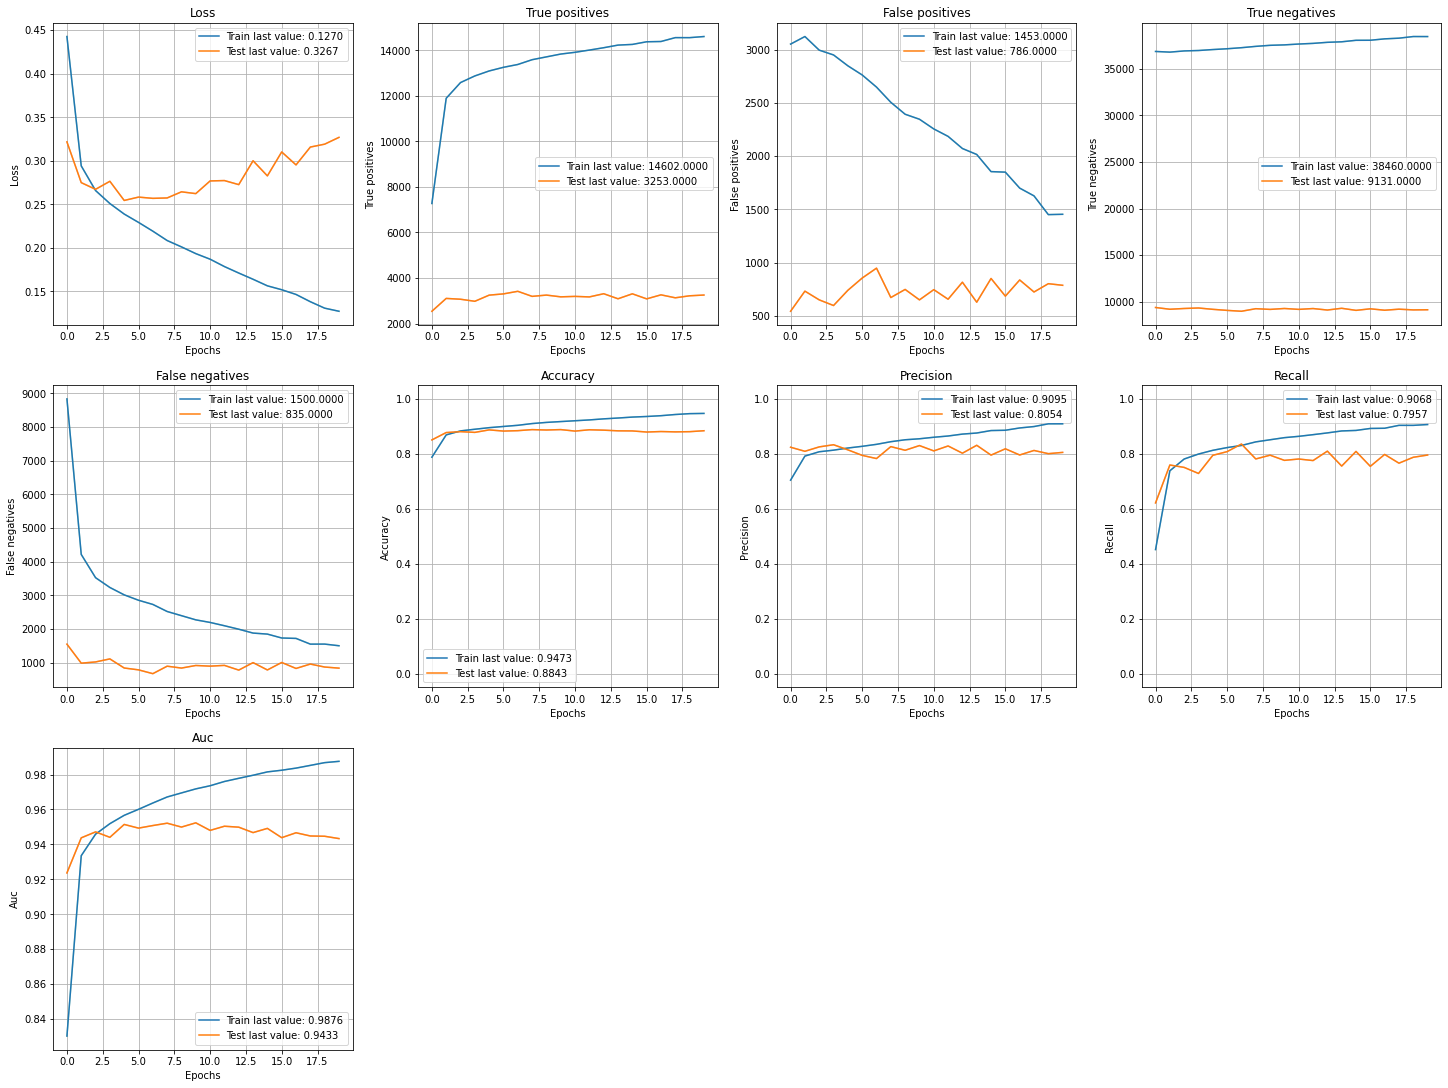

In [ ]:
# using trainable = False
plot_history(history)# gru  with attention(true)

In [ ]:
model_RNN.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 102)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 102, 300)     18835200    input_13[0][0]                   
__________________________________________________________________________________________________
bi_lstm_0 (Bidirectional)       (None, 102, 64)      85248       embedding_12[0][0]               
__________________________________________________________________________________________________
bi_lstm_1 (Bidirectional)       [(None, 102, 64), (N 24832       bi_lstm_0[0][0]                  
____________________________________________________________________________________________